# Numerical Results for the A+B→C Network

### Compare Gillespie simulation with mass action kinetics and Plefka approximation

In [17]:
using Pkg
cd(@__DIR__)
Pkg.activate("../../")
using CRN
using PyPlot
PyPlot.PyDict(PyPlot.matplotlib."rcParams")["font.size"] = 16

 Activating environment at `~/ownCloud/Master/Simulations/CRN/Project.toml`


16

In [18]:
function ABC_params()
    # Parameters
    num_species = 3     # number of species
    num_int = 1         # number of interaction reaction

    # Reaction constants
    k1 = [8, 8, 3]      # Creation
    k2 = [3, 2, 1.5]    # Annihiliation
    k3 = [0.5]          # Interaction
    k = [k1, k2, k3]

    # Stoichiometric
    s_i = zeros(Int, num_int, num_species)
    r_i = copy(s_i)
    s_i[1,:] = [0 0 1]
    r_i[1,:] = [1 1 0]

    # Times
    t_init = 0.0        # Start time
    t_final = 5.0       # End time
    delta_t = 0.01       # time step

    # Initial condition
    x0 = k1 ./ k2
    
    return Parameters(x0, k, s_i, r_i, t_init, t_final, delta_t)
end
p = ABC_params()
ts = tspan(p);

## Gillespie Simulation

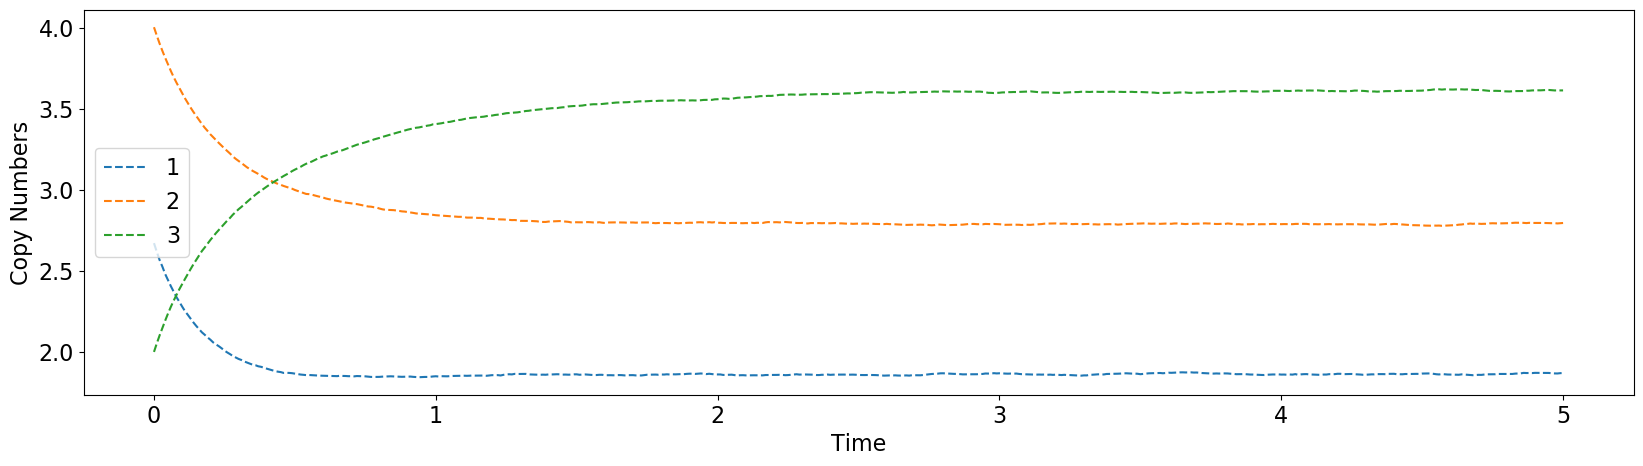

PyObject Text(32.999999999999986, 0.5, 'Copy Numbers')

In [19]:
N = 100000   # Repititions
res_gil = gillespie_avg(p.x0, p.k, p.s_i, p.r_i, ts, N)
plot_trajectories(res_gil)

## Mass Action Kinetics

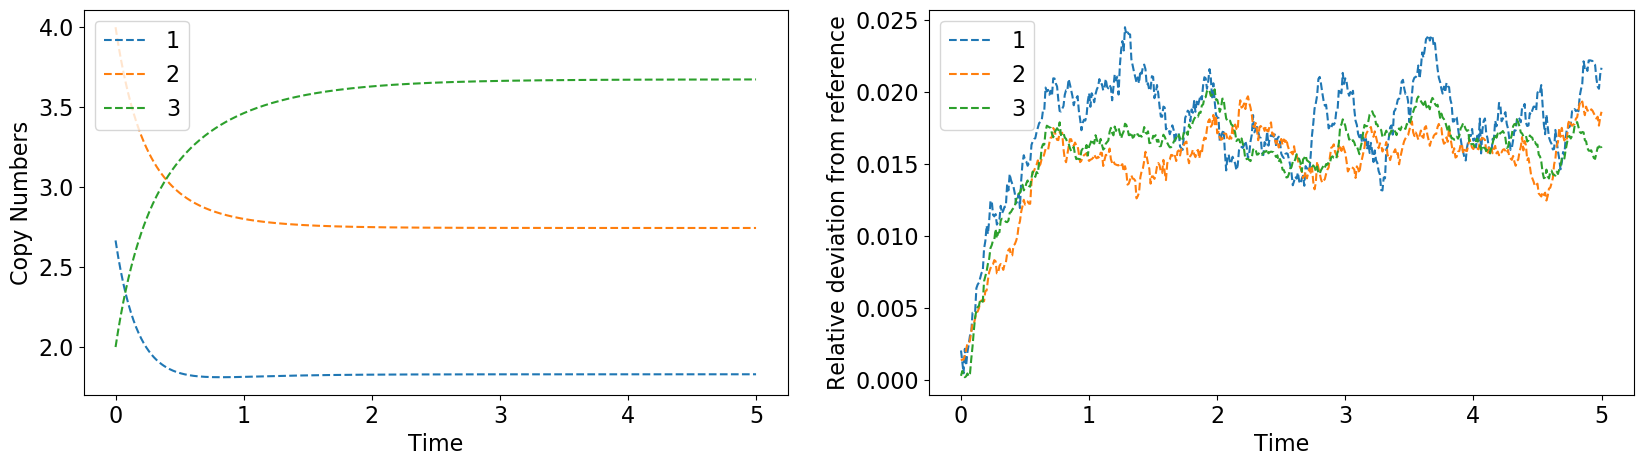

PyObject Text(850.2045454545454, 0.5, 'Relative deviation from reference')

In [20]:
function f_massAction!(du,u,k,t)
    du[1] = k[1][1] - k[2][1]*u[1] - k[3][1]*u[1]*u[2]
    du[2] = k[1][2] - k[2][2]*u[2] - k[3][1]*u[1]*u[2]
    du[3] = k[1][3] - k[2][3]*u[3] + k[3][1]*u[1]*u[2]
end

ta = (ts[1], ts[end])
res_ma = ode_solver(f_massAction!, p.k, ta, p.delta_t, p.x0)
plot_trajectories_and_deviation(res_ma, res_gil)

## Plefka with linear O.P. and power α¹ 

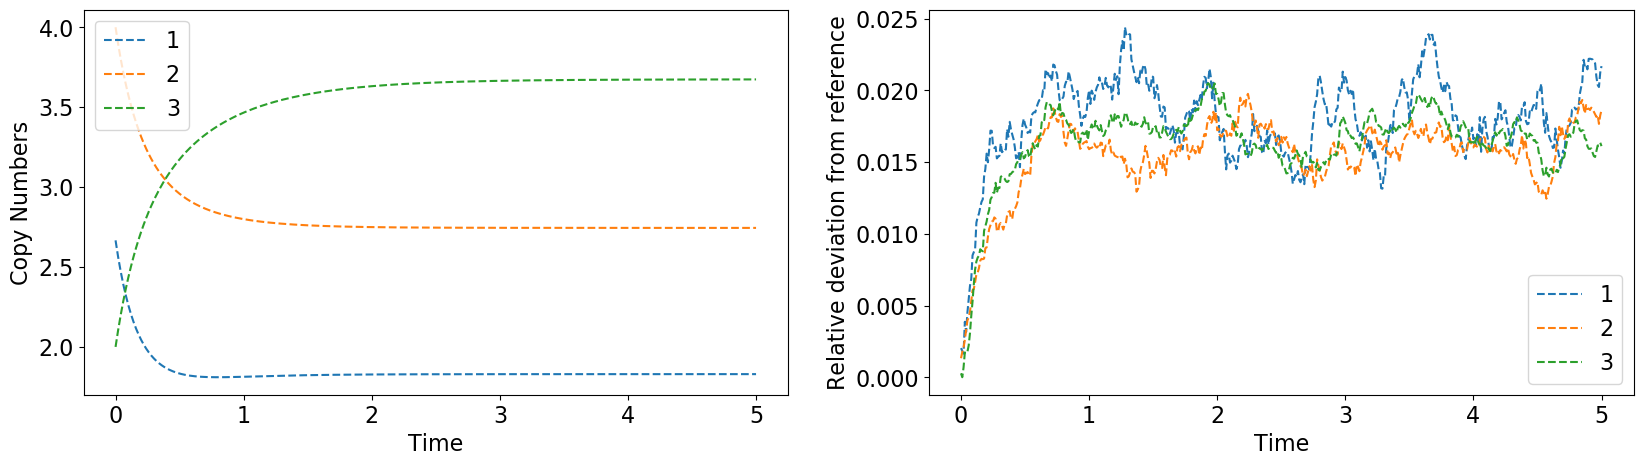

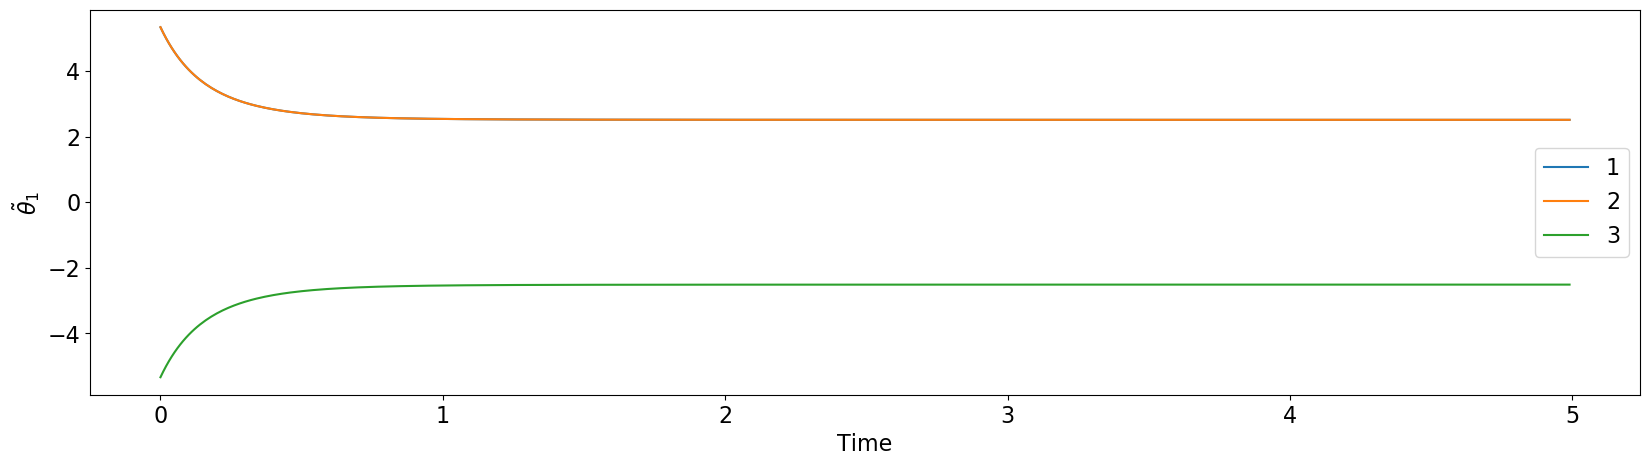

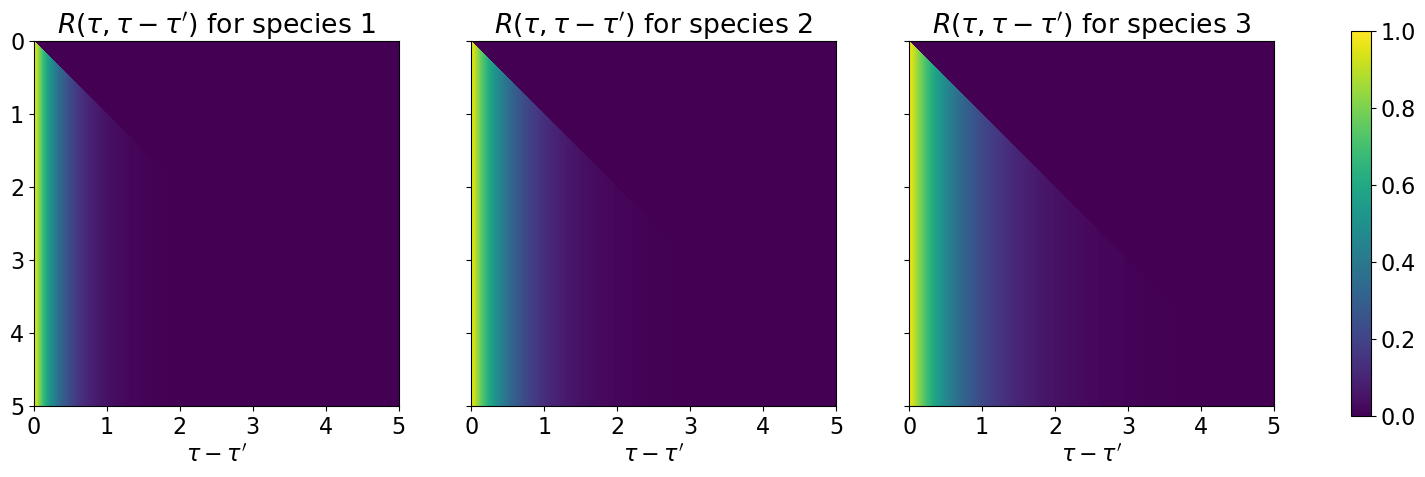

In [21]:
plf_sim_11 = Plefka(1.0, 1, "linear") # α, alphaOrder, orderParameter
res_plf_11 = euler_step(p.x0, p.k, ts, plf_sim_11, p.s_i, p.r_i)
plot_trajectories_and_deviation(res_plf_11[1], res_gil)
plot_hatTheta(ts, res_plf_11[3])
plot_responses(res_plf_11[2])

## Plefka with linear O.P. and power α²

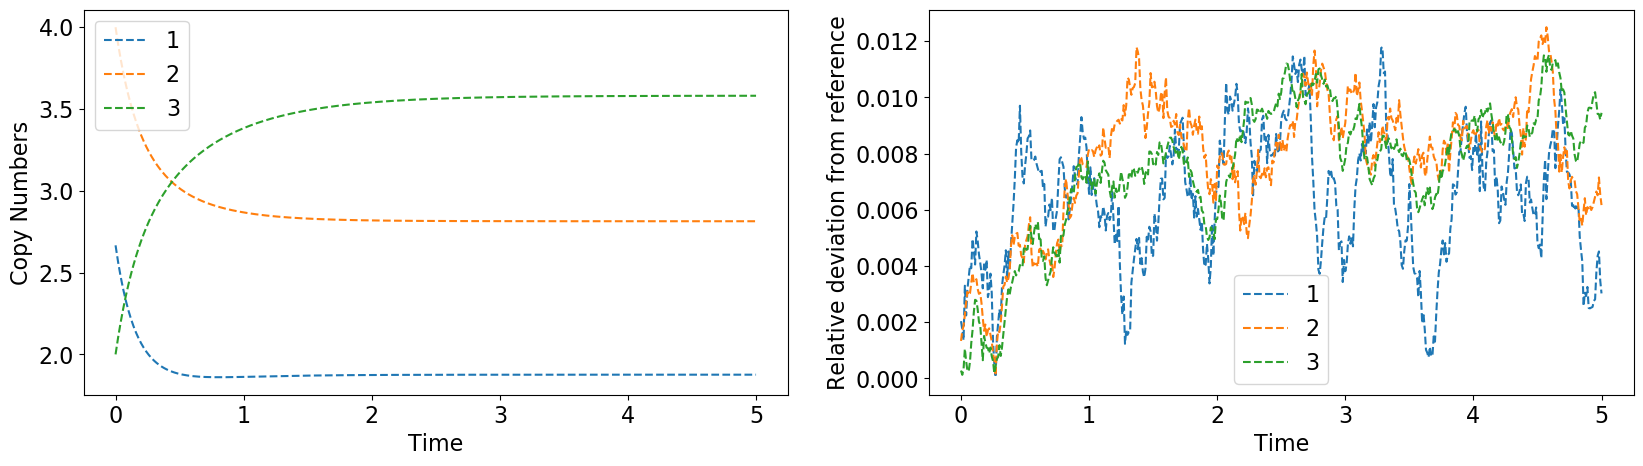

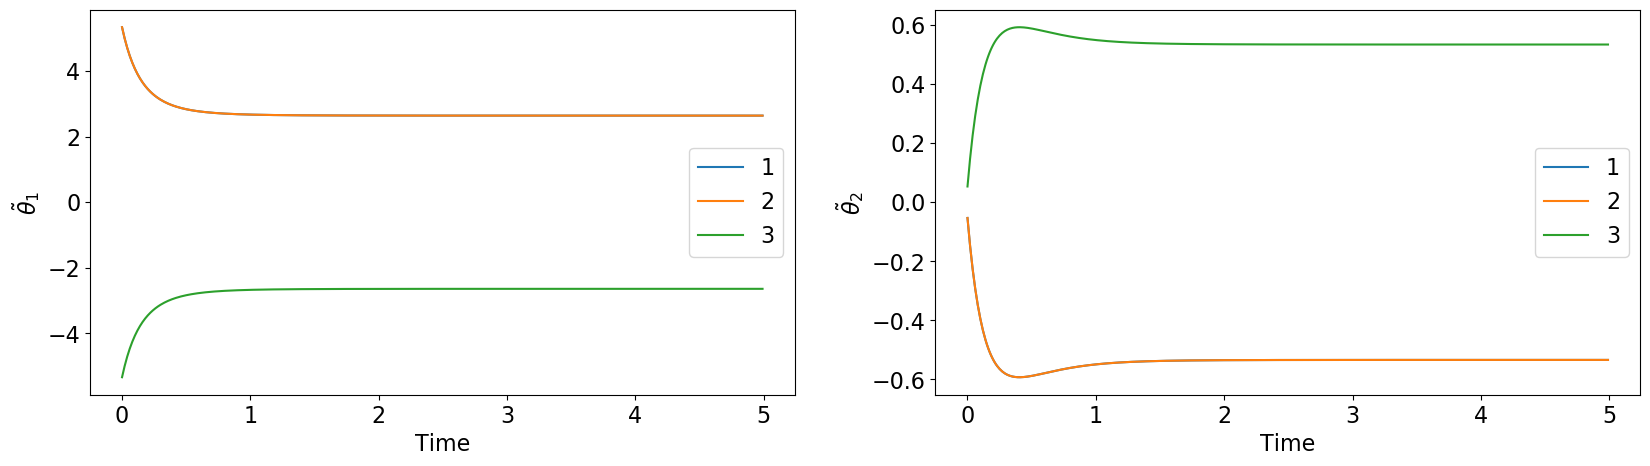

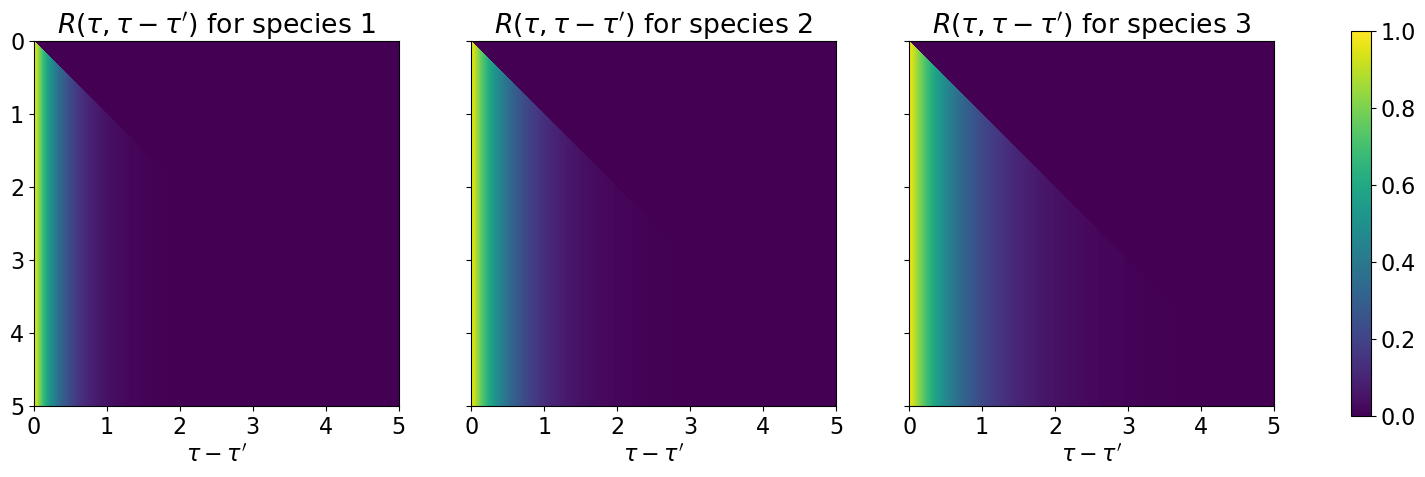

In [22]:
plf_sim_21 = Plefka(1.0, 2, "linear") # α, alphaOrder, orderParameter
res_plf_21 = euler_step(p.x0, p.k, ts, plf_sim_21, p.s_i, p.r_i)
plot_trajectories_and_deviation(res_plf_21[1], res_gil)
plot_hatTheta(ts, res_plf_21[3])
plot_responses(res_plf_21[2])

## Plefka with quad O.P. and power α¹ 

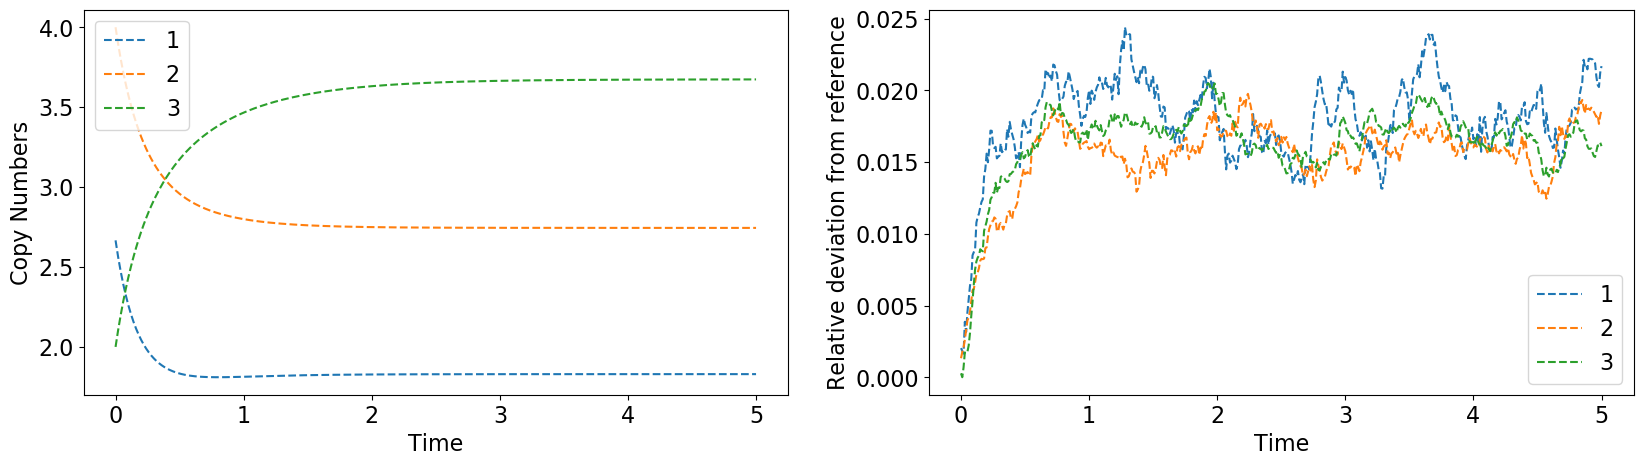

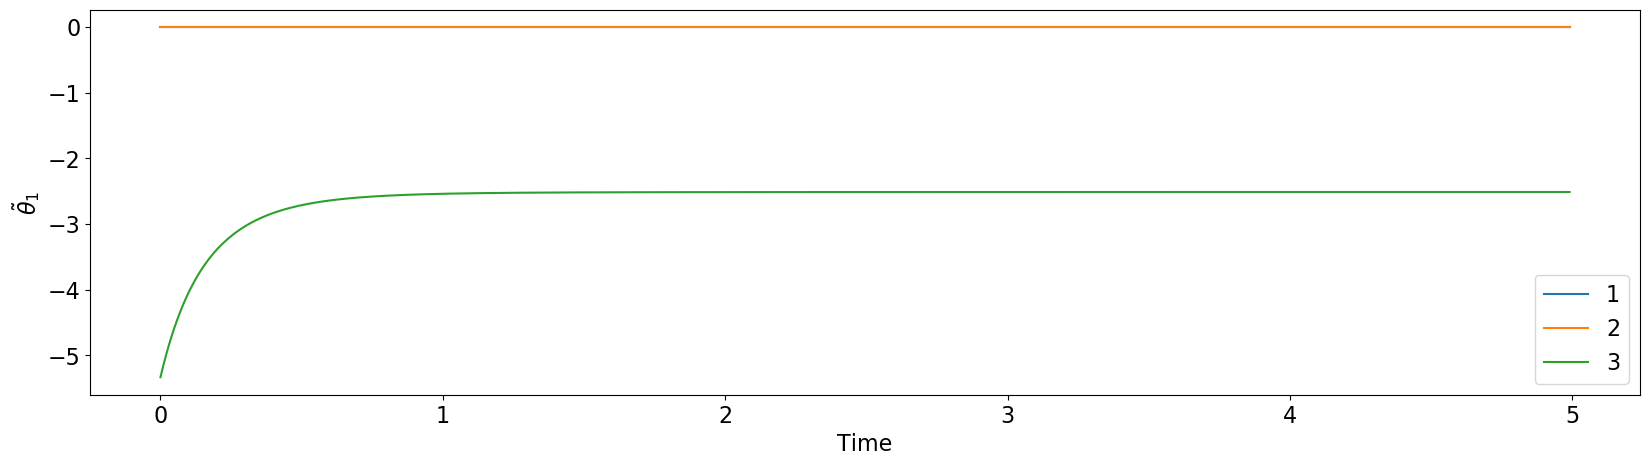

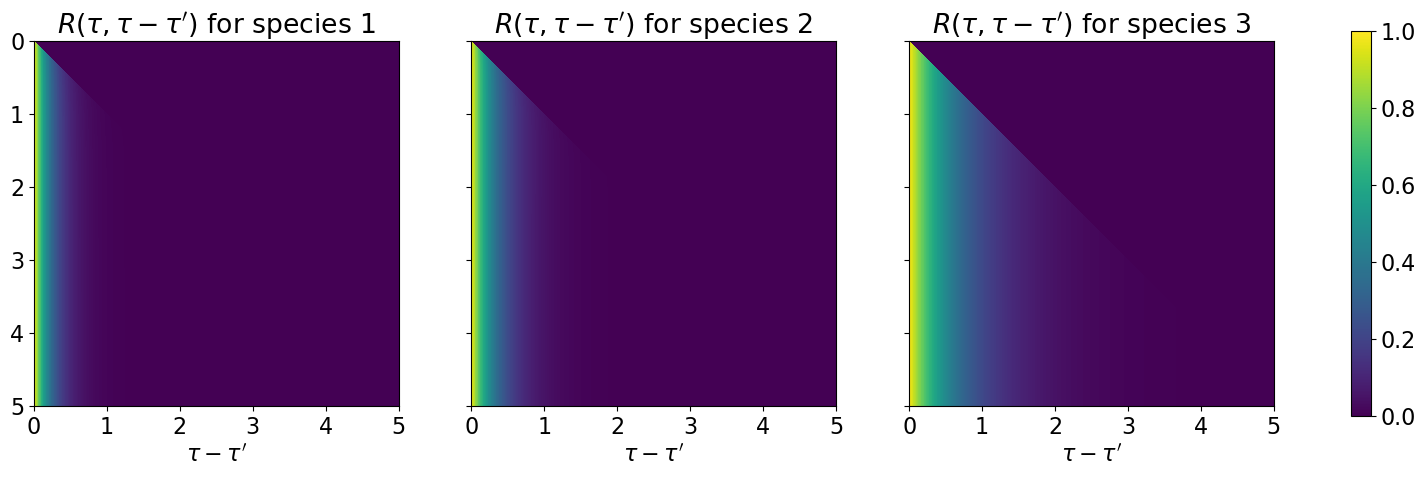

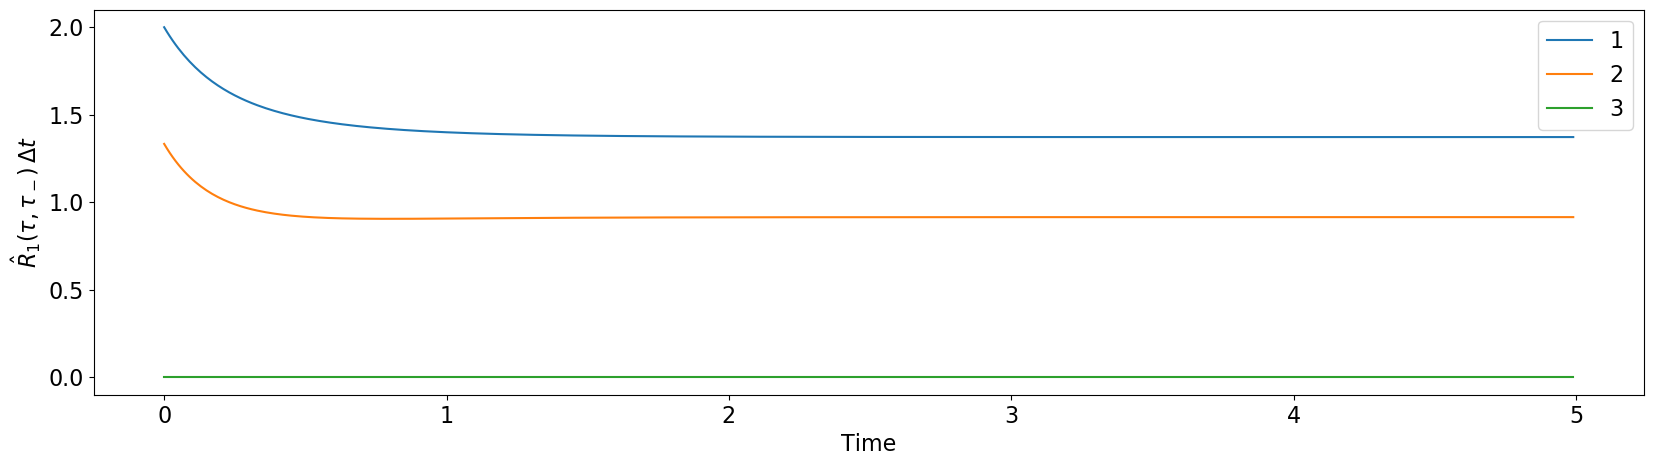

PyObject Text(43.17777777777776, 0.5, '$\\hat{R}_1(\\tau,\\tau_-)\\,\\Delta t$')

In [23]:
plf_sim_12 = Plefka(1.0, 1, "quad") # α, alphaOrder, orderParameter
res_plf_12 = euler_step(p.x0, p.k, ts, plf_sim_12, p.s_i, p.r_i)
plot_trajectories_and_deviation(res_plf_12[1], res_gil)
plot_hatTheta(ts, res_plf_12[3])
plot_responses(res_plf_12[2])
plot_hatR_diag(ts, res_plf_12[3])

## Plefka with quad O.P. and power α²

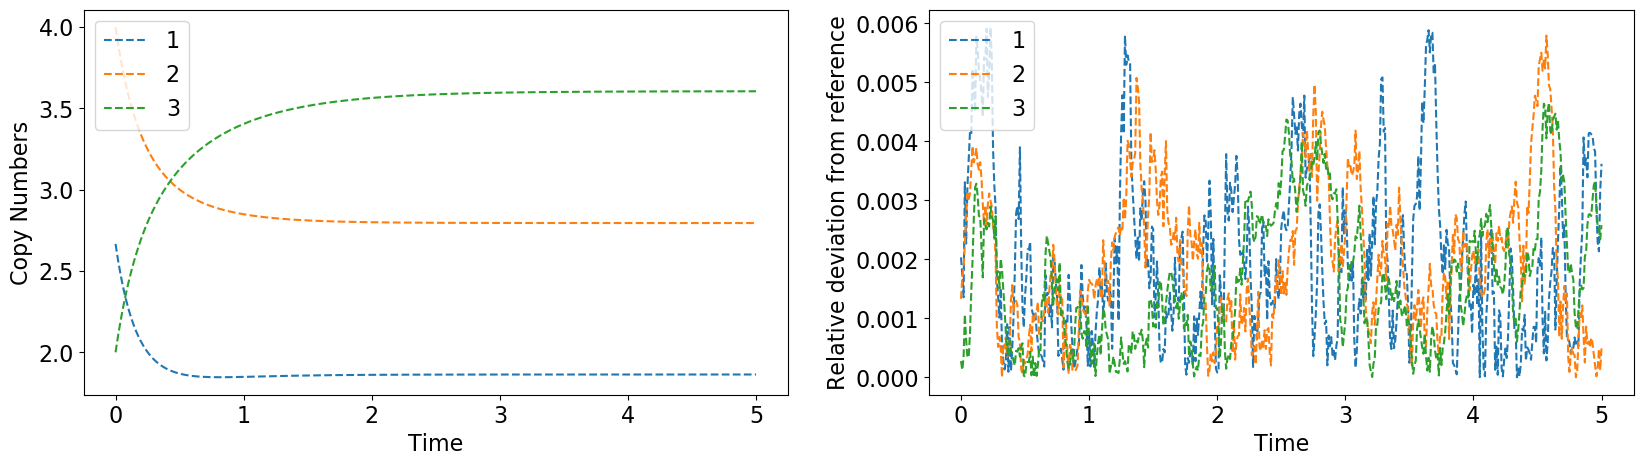

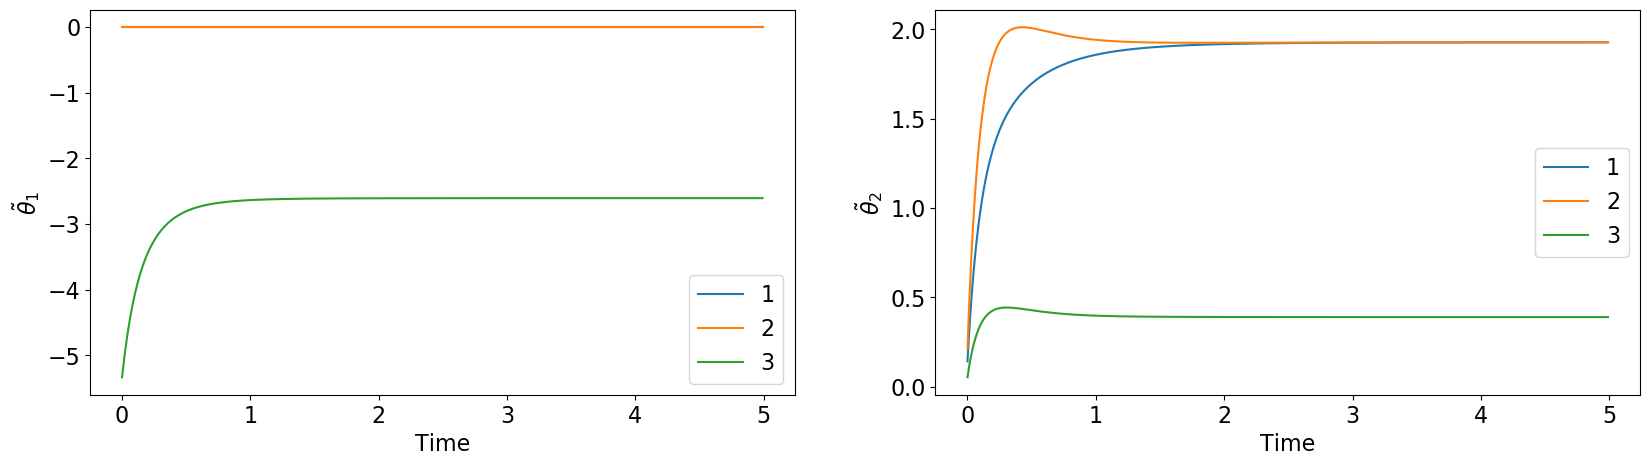

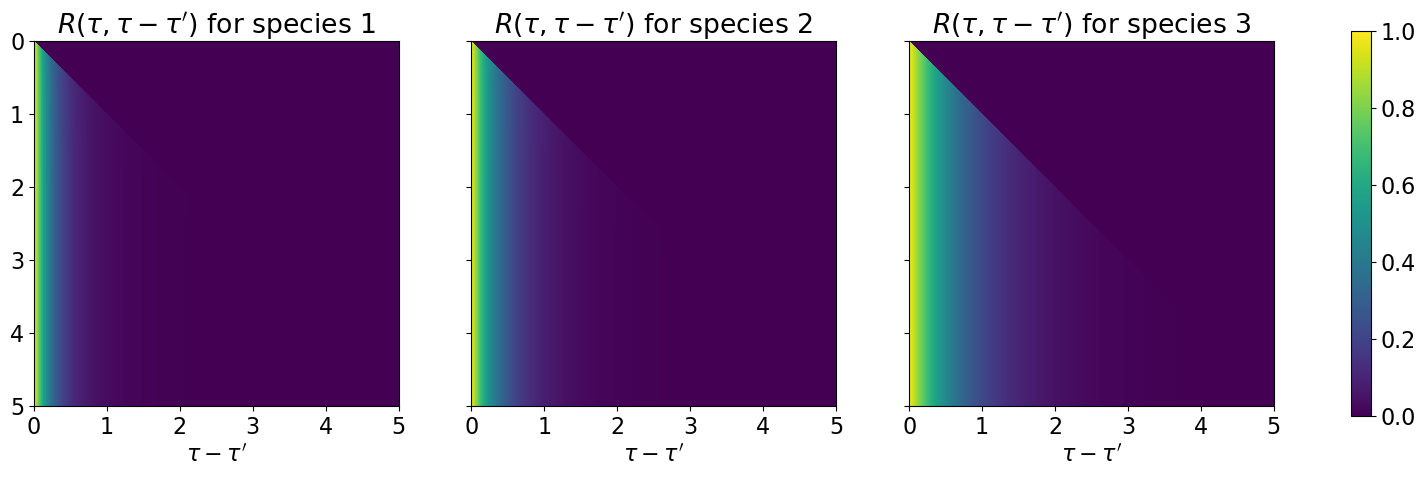

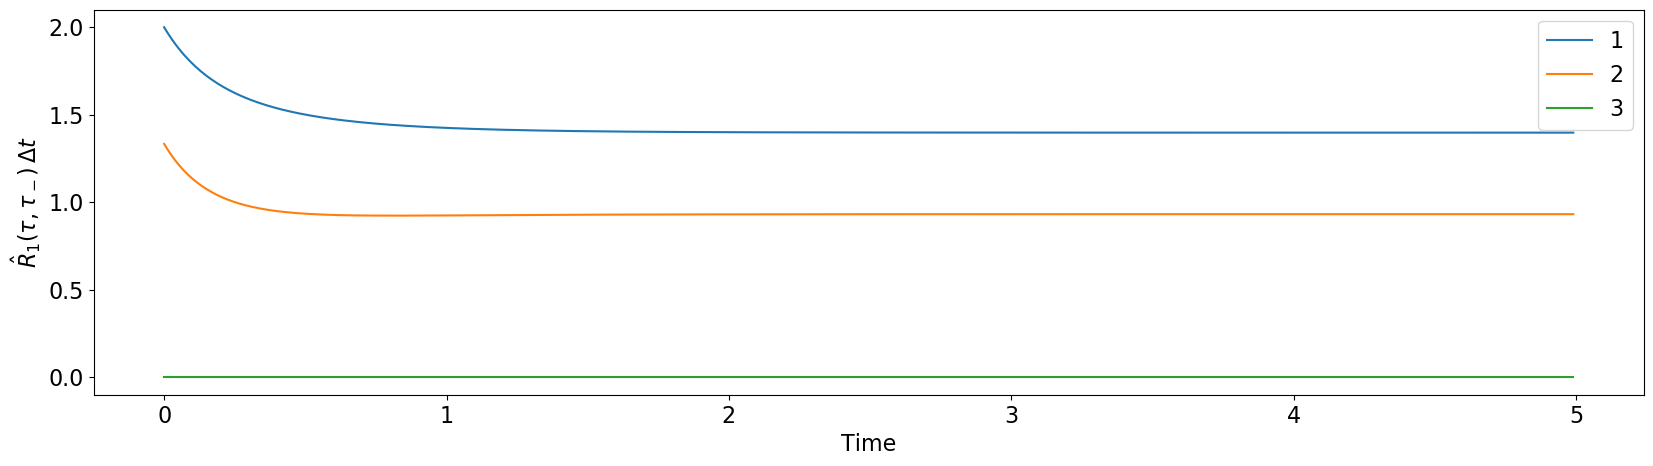

PyObject Text(43.17777777777776, 0.5, '$\\hat{R}_1(\\tau,\\tau_-)\\,\\Delta t$')

In [24]:
plf_sim_22 = Plefka(1.0, 2, "quad") # α, alphaOrder, orderParameter
res_plf_22 = euler_step(p.x0, p.k, ts, plf_sim_22, p.s_i, p.r_i)
plot_trajectories_and_deviation(res_plf_22[1], res_gil)
plot_hatTheta(ts, res_plf_22[3])
plot_responses(res_plf_22[2])
plot_hatR_diag(ts, res_plf_22[3])

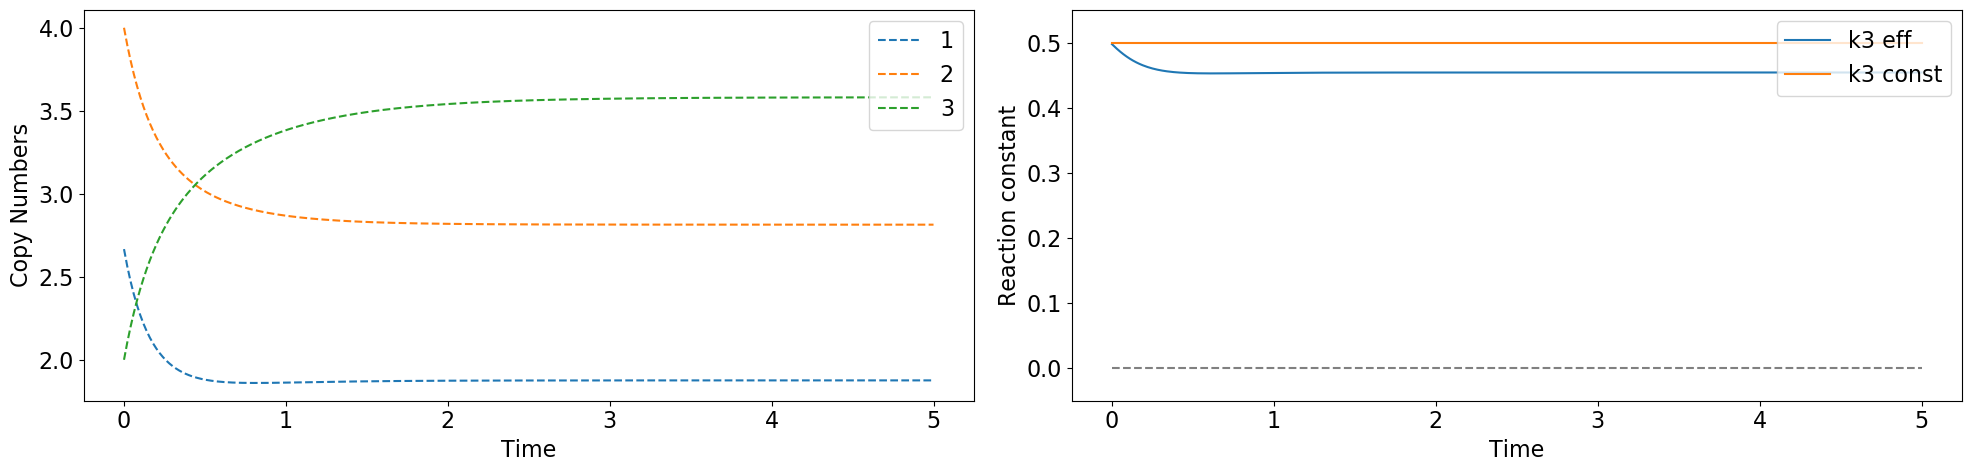

In [25]:
include("../../testing/testing.jl")
k3eff = get_k3eff(res_plf_21[1], res_plf_21[2].data, p.k[3][1])
plot_trajectories_and_k3eff(res_plf_21[1], k3eff, p.k[3][1], p.k[3][1])

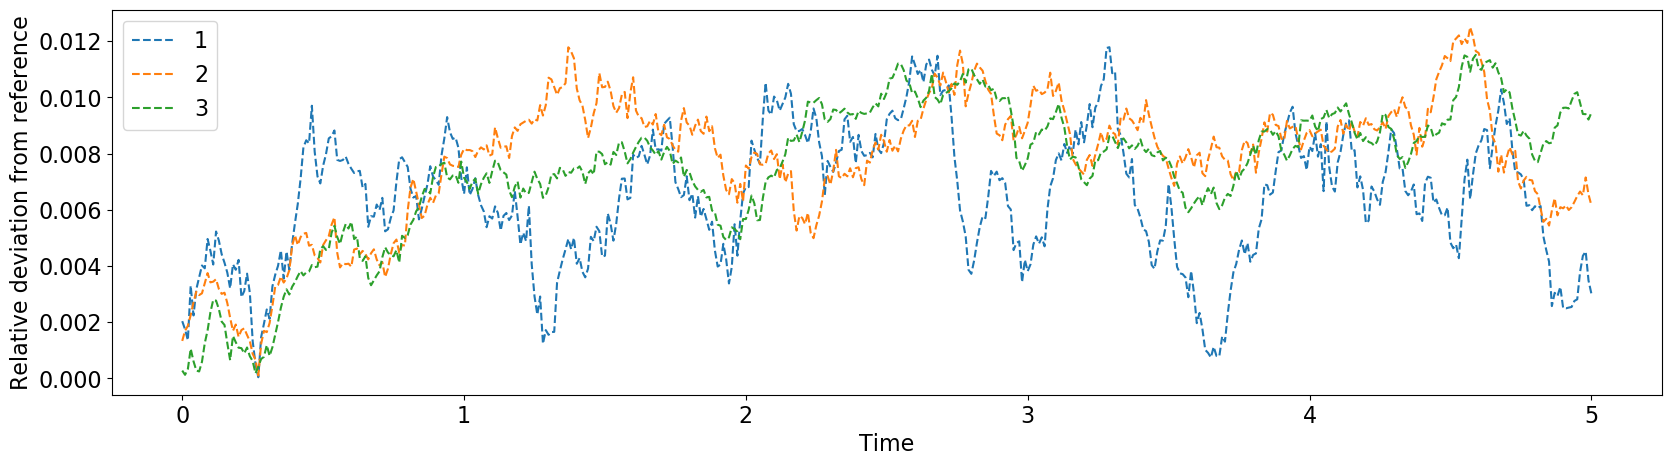

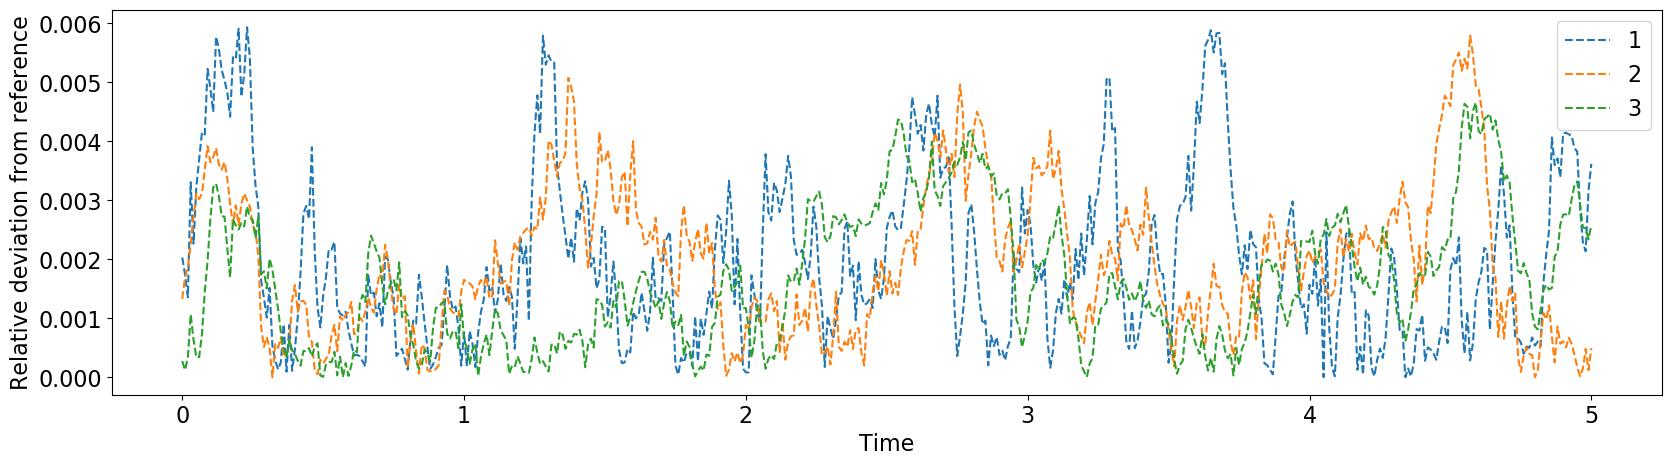

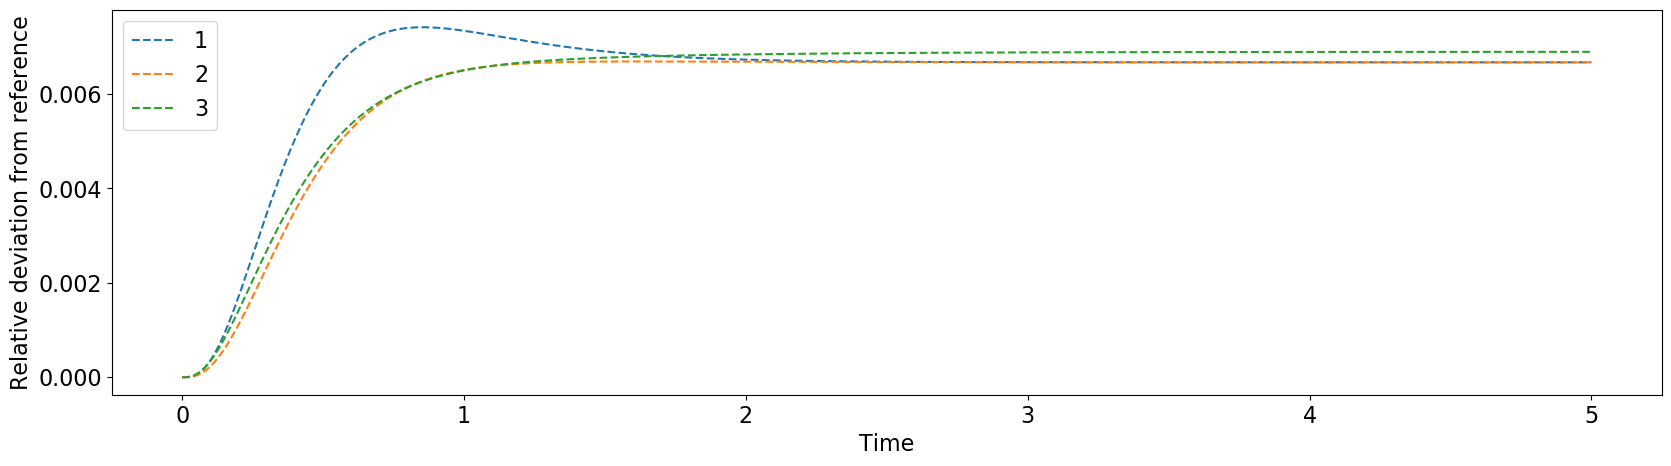

PyObject Text(32.999999999999986, 0.5, 'Relative deviation from reference')

In [26]:
plot_deviation(res_plf_21[1], res_gil)
plot_deviation(res_plf_22[1], res_gil)
plot_deviation(res_plf_21[1], res_plf_22[1])

In [27]:
idx_species = 1
title = ["GIL" "lin-1" "quad-1" "lin-2" "quad-2"]
[ title; res_gil.data[idx_species,:] res_plf_11[1].data[idx_species,:] res_plf_12[1].data[idx_species,:] res_plf_21[1].data[idx_species,:] res_plf_22[1].data[idx_species,:] ]

502×5 Array{Any,2}:
  "GIL"    "lin-1"   "quad-1"   "lin-2"   "quad-2"
 2.6721   2.66667   2.66667    2.66667   2.66667
 2.61816  2.61333   2.61333    2.6136    2.6136
 2.5676   2.56336   2.56336    2.56412   2.56412
 2.5263   2.51653   2.51653    2.51798   2.51794
 2.48046  2.47261   2.47261    2.47491   2.47484
 2.44245  2.43141   2.43141    2.43471   2.43457
 2.40581  2.39276   2.39276    2.39716   2.39693
 2.3716   2.35649   2.35649    2.36208   2.36174
 2.33845  2.32243   2.32243    2.32929   2.32882
 2.3101   2.29046   2.29046    2.29864   2.29802
 2.28033  2.26042   2.26042    2.26998   2.26918
 2.2523   2.23221   2.23221    2.24318   2.24217
 ⋮                                       
 1.86985  1.82971   1.82971    1.87593   1.86351
 1.87125  1.82971   1.82971    1.87593   1.86351
 1.87127  1.82971   1.82971    1.87593   1.86351
 1.87122  1.82971   1.82971    1.87593   1.86351
 1.87118  1.82971   1.82971    1.87593   1.86351
 1.87078  1.82971   1.82971    1.87593   1.86351
 1.870

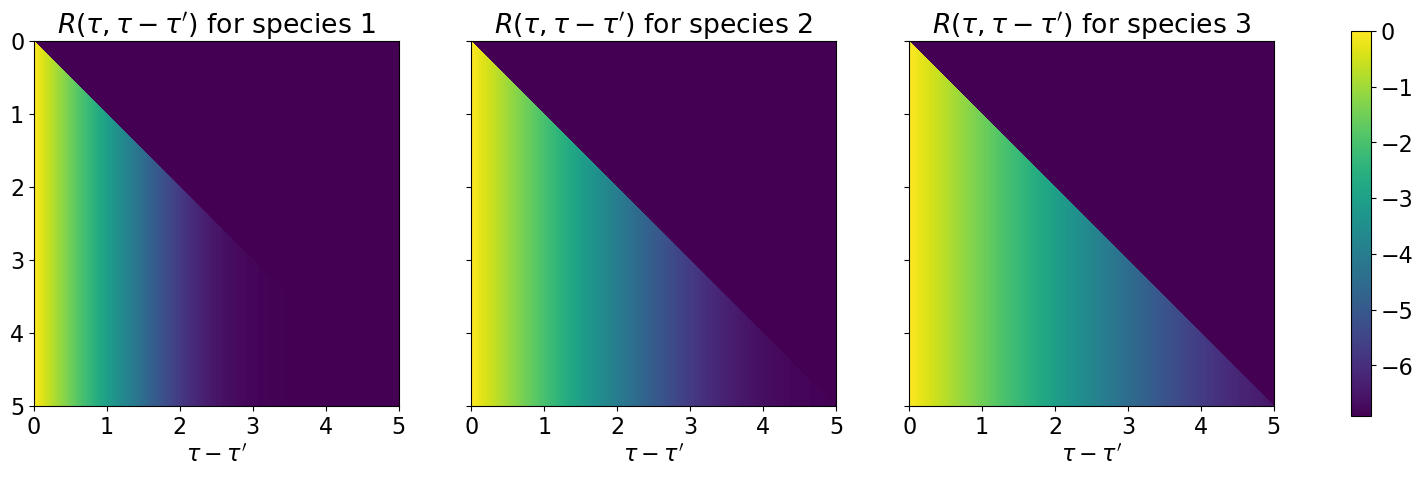

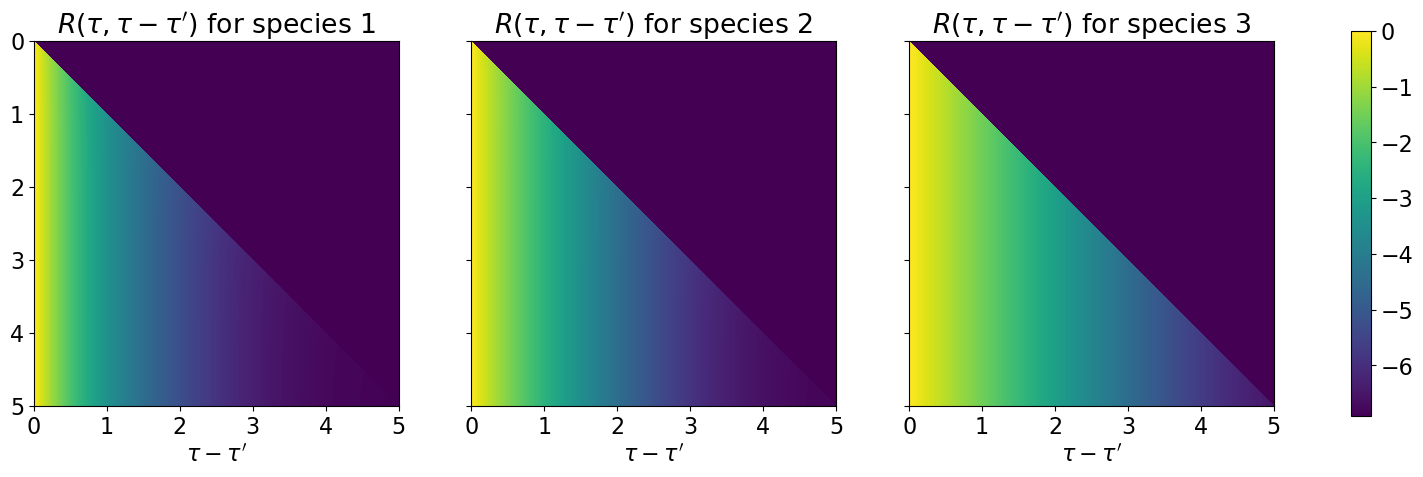

In [28]:
plot_responses(Responses(ts, log.(res_plf_21[2].data .+ 1e-3)))
plot_responses(Responses(ts, log.(res_plf_22[2].data .+ 1e-3)))